In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
dataset = pd.read_csv("Covid_19_Pakistan_Raw_data.csv")

In [40]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,PAK,Asia,Pakistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,235824864,NaN,NaN,NaN,NaN
1,PAK,Asia,Pakistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,235824864,NaN,NaN,NaN,NaN
2,PAK,Asia,Pakistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,235824864,NaN,NaN,NaN,NaN
3,PAK,Asia,Pakistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,235824864,NaN,NaN,NaN,NaN
4,PAK,Asia,Pakistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557,235824864,NaN,NaN,NaN,NaN


In [41]:
dataset.shape

(1674, 67)

In [42]:
dataset.isnull().sum()

iso_code                                         0
continent                                        0
location                                         0
date                                             0
total_cases                                      0
new_cases                                        0
new_cases_smoothed                               5
total_deaths                                     0
new_deaths                                       0
new_deaths_smoothed                              5
total_cases_per_million                          0
new_cases_per_million                            0
new_cases_smoothed_per_million                   5
total_deaths_per_million                         0
new_deaths_per_million                           0
new_deaths_smoothed_per_million                  5
reproduction_rate                              651
icu_patients                                  1674
icu_patients_per_million                      1674
hosp_patients                  

In [59]:
# These columns mostly contain null values and are not useful for current analysis
colRemove = [
    'reproduction_rate',
    'icu_patients',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests',
    'new_tests',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'new_tests_smoothed_per_thousand',
    'positive_rate',
    'tests_per_case',
    'tests_units',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'total_boosters',
    'new_vaccinations',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million'
]

In [60]:
# Drop only those columns from the dataset that exist in the DataFrame
dataset = dataset.drop(columns=[i for i in colRemove if i in dataset.columns])

In [45]:
dataset.shape

(1674, 31)

In [46]:
dataset.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 5
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                5
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     5
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    5
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
handwashing_facilities             0
h

In [63]:
# Fill missing values in the "new_cases_smoothed" column using backward fill
# This replaces each NaN with the next valid value in the column
dataset["new_cases_smoothed"] = dataset["new_cases_smoothed"].bfill()

In [62]:
# Fill missing values in the "new_deaths_smoothed" column using backward fill
dataset["new_deaths_smoothed"] = dataset["new_deaths_smoothed"].bfill()

In [64]:
# Fill missing values in the "new_cases_smoothed_per_million" column using backward fill
dataset["new_cases_smoothed_per_million"] = dataset["new_cases_smoothed_per_million"].bfill()

In [65]:
# Fill missing values in the "new_deaths_smoothed_per_million" column using backward fill
dataset["new_deaths_smoothed_per_million"] = dataset["new_deaths_smoothed_per_million"].bfill()

In [66]:
# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset["date"])

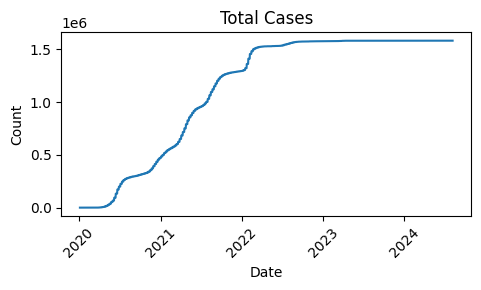

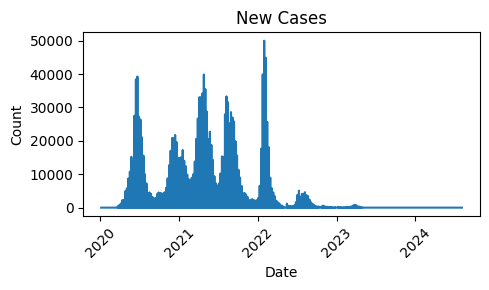

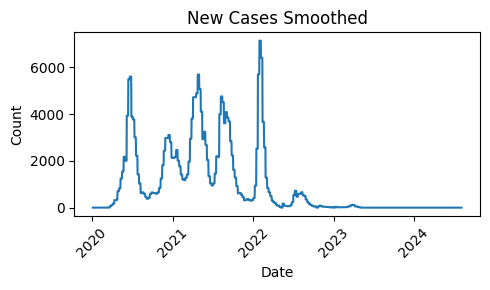

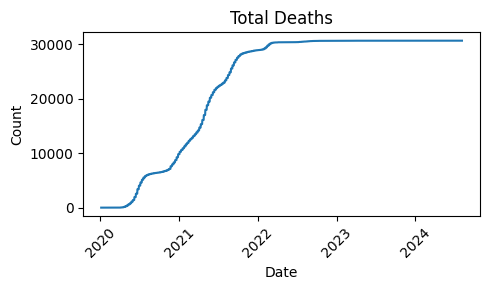

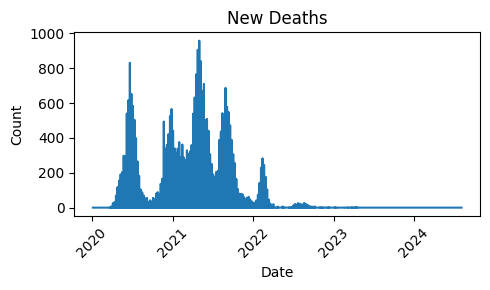

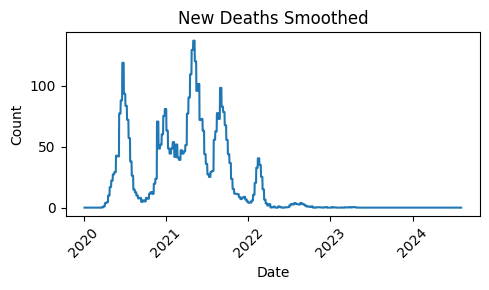

In [68]:
# Plot selected COVID-19 metrics over time using line charts
columns_to_plot = [
    ('total_cases', 'Total Cases'),
    ('new_cases', 'New Cases'),
    ('new_cases_smoothed', 'New Cases Smoothed'),
    ('total_deaths', 'Total Deaths'),
    ('new_deaths', 'New Deaths'),
    ('new_deaths_smoothed', 'New Deaths Smoothed')
]
# Loop through selected columns and plot each as a line chart with formatted layout
for col, title in columns_to_plot:
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='date', y=col, data=dataset)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


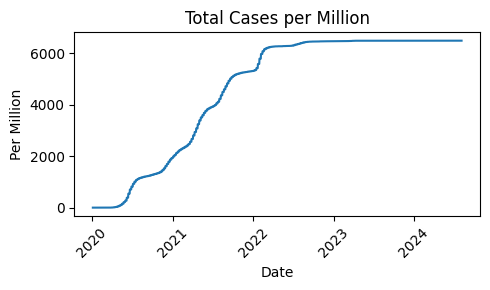

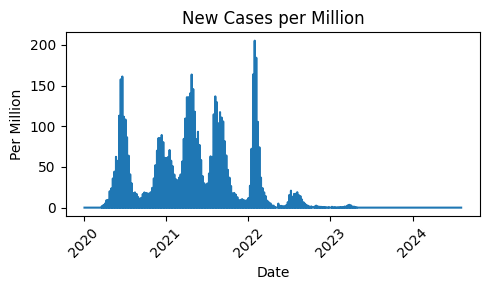

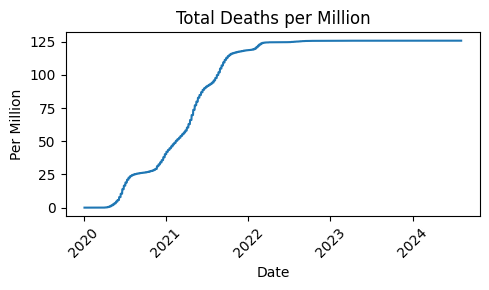

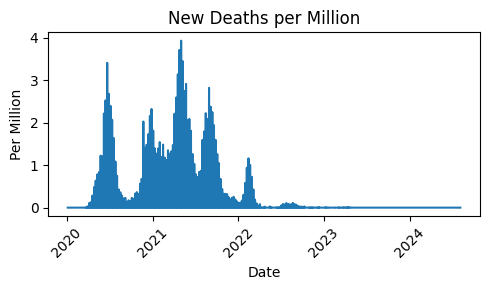

In [69]:
# Visualize normalized COVID-19 data (per million) over time using line plots
columns_to_plot = [
    ('total_cases_per_million', 'Total Cases per Million'),
    ('new_cases_per_million', 'New Cases per Million'),
    ('total_deaths_per_million', 'Total Deaths per Million'),
    ('new_deaths_per_million', 'New Deaths per Million')
]
for col, title in columns_to_plot:
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='date', y=col, data=dataset)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Per Million')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


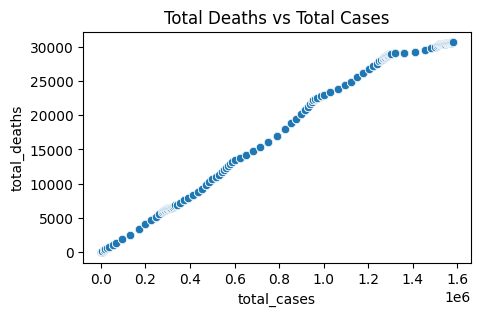

In [70]:
# Create a scatter plot to show the relationship between total cases and total deaths
plt.figure(figsize=(5, 3))
sns.scatterplot(x='total_cases', y='total_deaths', data=dataset)
plt.title("Total Deaths vs Total Cases")
plt.show()


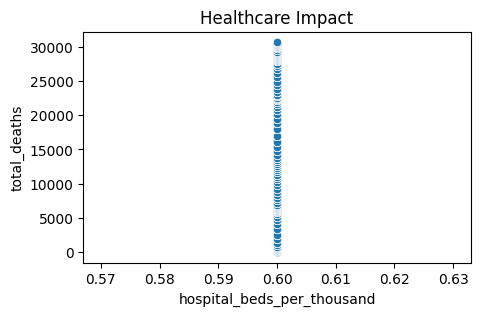

In [71]:
# Scatter plot to explore the impact of hospital bed availability on total deaths
plt.figure(figsize=(5, 3))
sns.scatterplot(x='hospital_beds_per_thousand', y='total_deaths', data=dataset)
plt.title("Healthcare Impact")
plt.show()


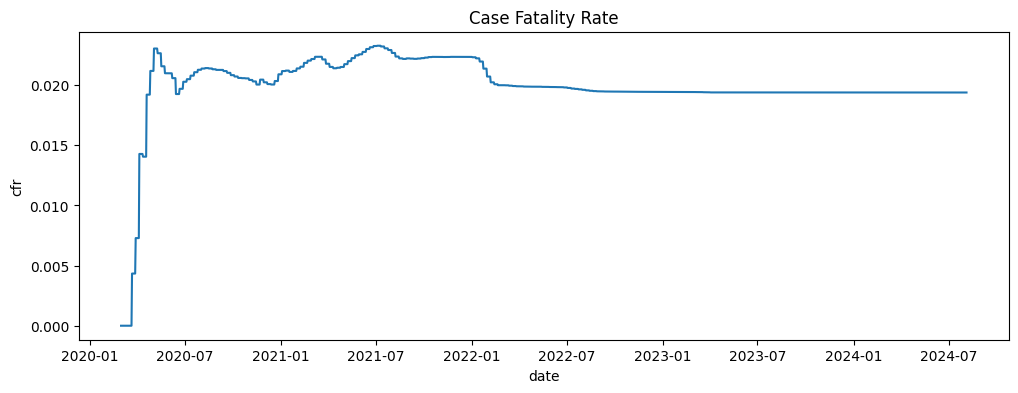

In [72]:
# Plot the Case Fatality Rate (CFR) over time to observe changes in death-to-case ratio
plt.figure(figsize=(12, 4))
dataset['cfr'] = dataset['total_deaths'] / dataset['total_cases']
sns.lineplot(x='date', y='cfr', data=dataset)
plt.title("Case Fatality Rate")
plt.show()

In [73]:
dataset.shape

(1674, 32)

In [75]:
dataset['cfr'].tail()

1669    0.019395
1670    0.019395
1671    0.019395
1672    0.019395
1673    0.019395
Name: cfr, dtype: float64

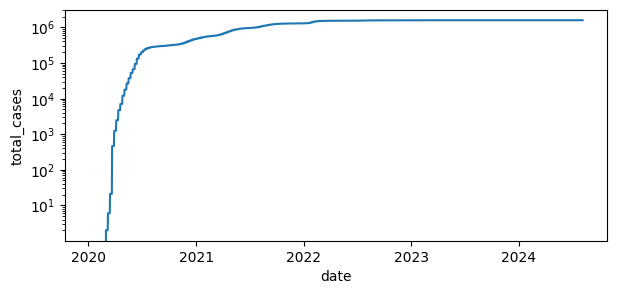

In [76]:
# Log-scale line plot to visualize total cases growth over time more clearly
plt.figure(figsize=(7, 3))
plt.yscale('log')
sns.lineplot(x='date', y='total_cases', data=dataset)
plt.show()

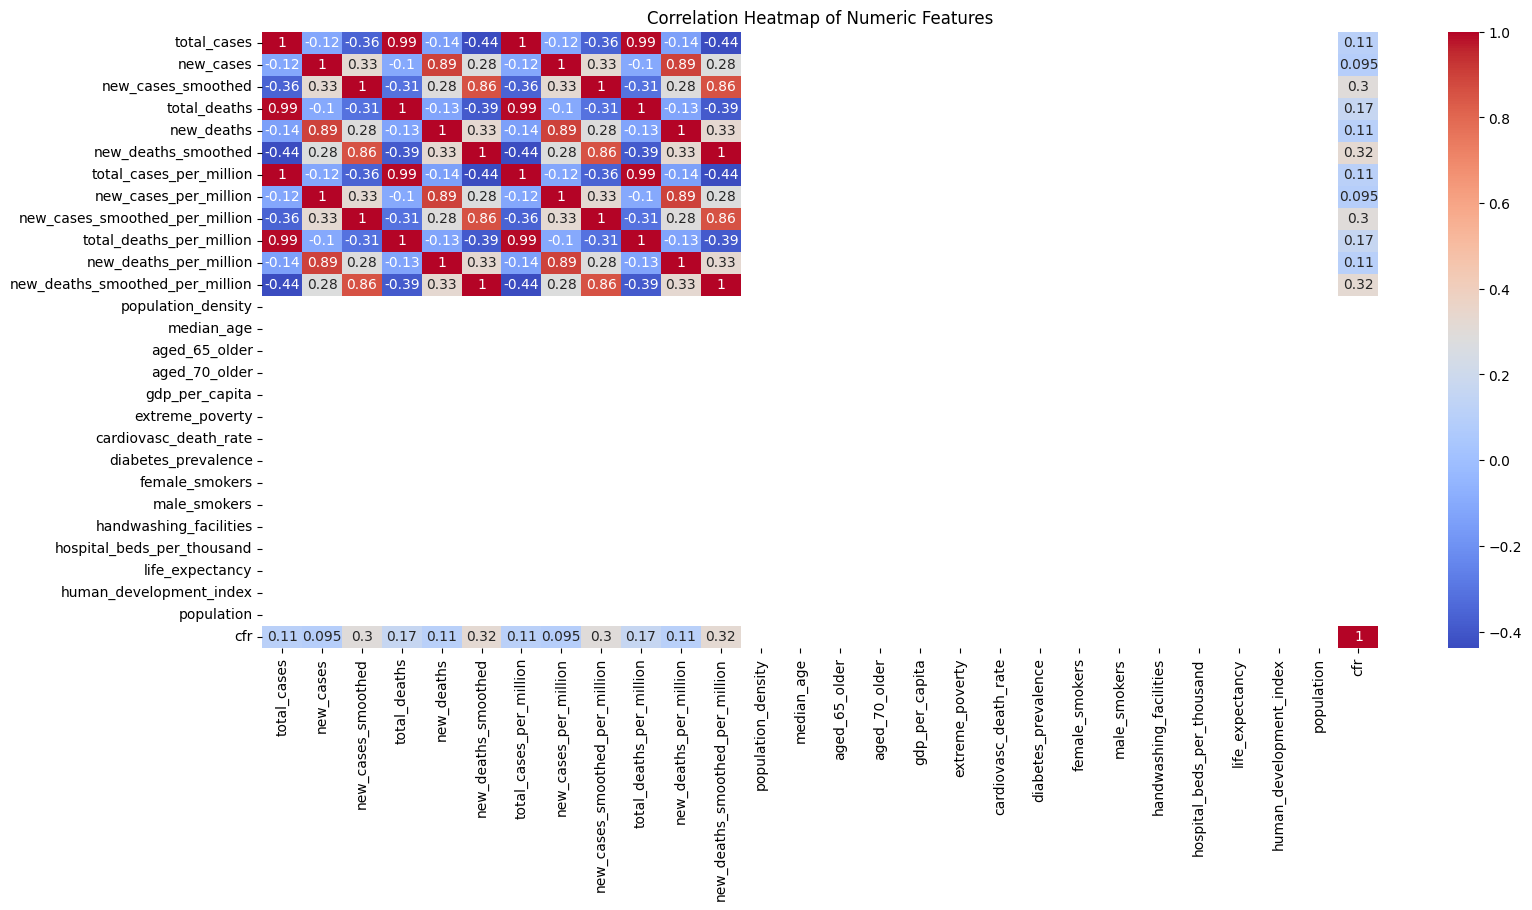

In [78]:
numeric_data = dataset.select_dtypes(["float64","int64"])
# Generate a heatmap to visualize correlations between all numeric features
plt.figure(figsize=(18, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [79]:
# End of COVID-19 Data Visualization for Pakistan
# This script provided a comprehensive visual analysis of key metrics, including case trends,
# mortality rates, healthcare impact, and feature correlations to support data-driven insights.